In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from collections import Counter
from sklearn.decomposition import PCA


In [4]:
# Generating synthetic dataset
X, y = make_classification(
    n_samples=5000, n_features=20, n_informative=15, n_redundant=5,
    n_classes=3, n_clusters_per_class=1, weights=[0.05, 0.15, 0.8],
    class_sep=1.0, random_state=42
)

In [5]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [6]:
# Helper function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    return accuracy, f1, auc

In [7]:
# Function to plot data
def plot_data(X, y, title):
    colors = ['#ef8a62', '#f7f7f7', '#67a9cf']
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=colors, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Classes", loc="best")
    plt.show()


In [8]:
# PCA transformation
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)


Original Dataset Distribution: Counter({2: 2781, 1: 536, 0: 183})


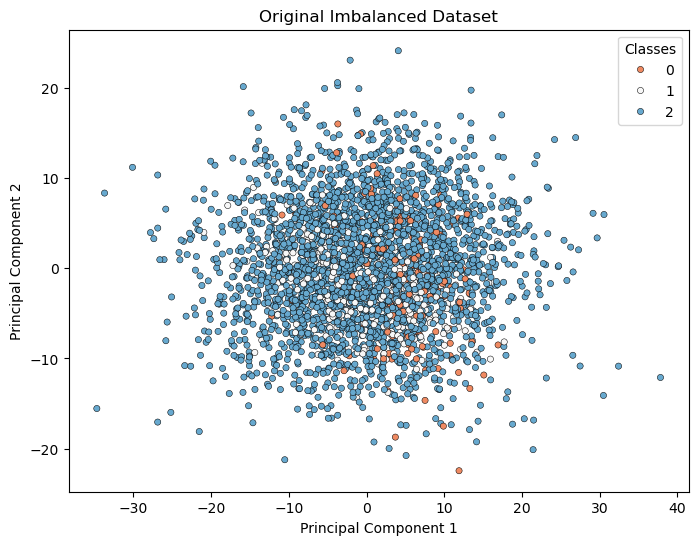

In [9]:
# Original dataset distribution
print("Original Dataset Distribution:", Counter(y_train))
plot_data(X_train_2d, y_train, "Original Imbalanced Dataset")


In [10]:
# Resampling techniques and performance evaluation
performance_results = {}


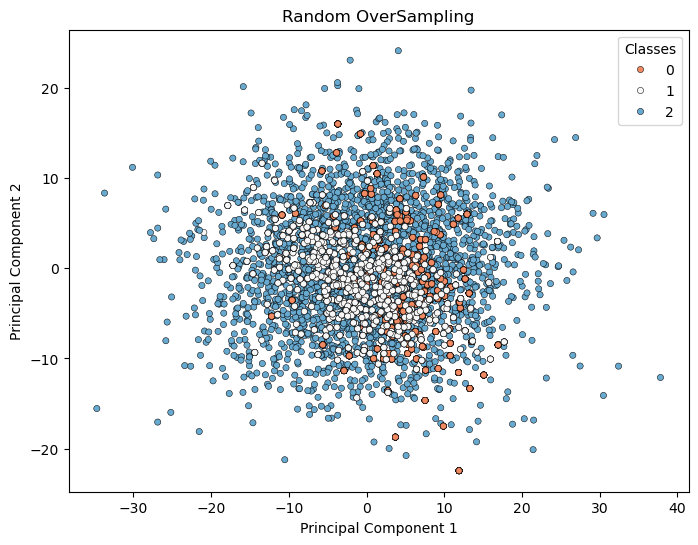

In [11]:
# Random OverSampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
X_ros_2d = pca.transform(X_ros)
performance_results['RandomOverSampler'] = evaluate_model(RandomForestClassifier(random_state=42).fit(X_ros, y_ros), X_test, y_test)
plot_data(X_ros_2d, y_ros, "Random OverSampling")

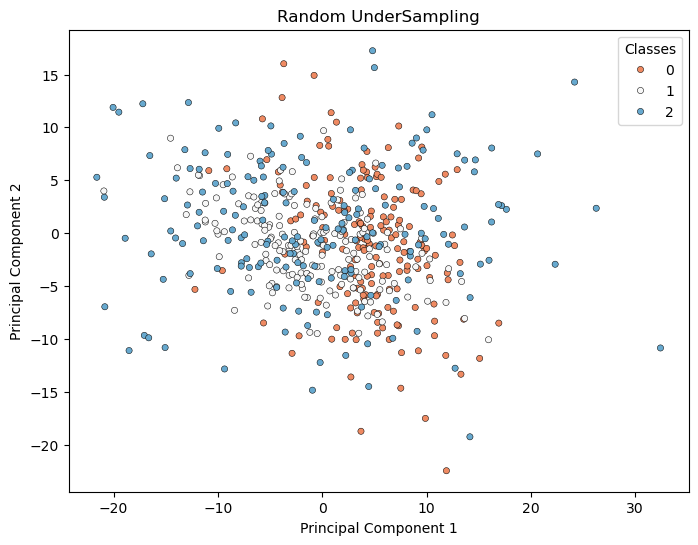

In [12]:
# Random UnderSampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_rus_2d = pca.transform(X_rus)
performance_results['RandomUnderSampler'] = evaluate_model(RandomForestClassifier(random_state=42).fit(X_rus, y_rus), X_test, y_test)
plot_data(X_rus_2d, y_rus, "Random UnderSampling")


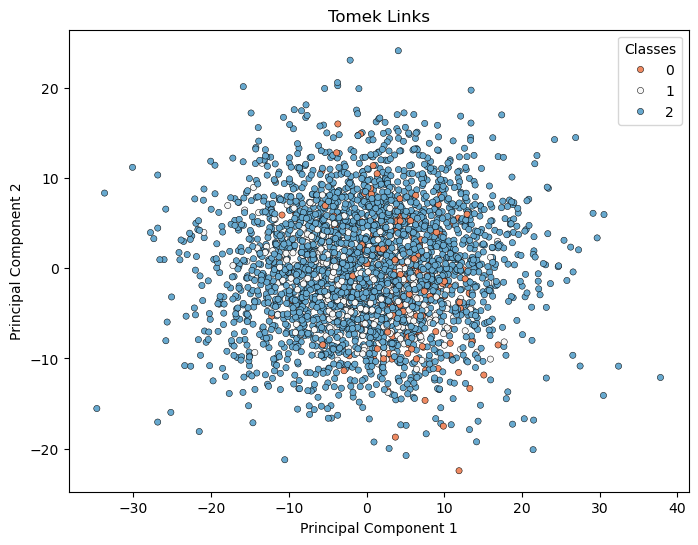

In [13]:
# Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)
X_tl_2d = pca.transform(X_tl)
performance_results['TomekLinks'] = evaluate_model(RandomForestClassifier(random_state=42).fit(X_tl, y_tl), X_test, y_test)
plot_data(X_tl_2d, y_tl, "Tomek Links")


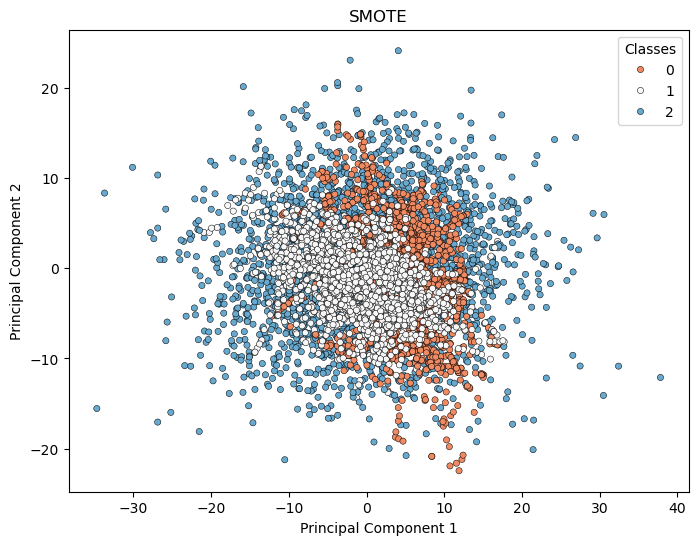

In [14]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote_2d = pca.transform(X_smote)
performance_results['SMOTE'] = evaluate_model(RandomForestClassifier(random_state=42).fit(X_smote, y_smote), X_test, y_test)
plot_data(X_smote_2d, y_smote, "SMOTE")

In [15]:
# Class Weighting
model_weighted = RandomForestClassifier(random_state=42, class_weight="balanced")
performance_results['ClassWeighting'] = evaluate_model(model_weighted.fit(X_train, y_train), X_test, y_test)


In [16]:
# Performance comparison
performance_df = pd.DataFrame(performance_results, index=["Accuracy", "F1 Score", "AUC"]).T
print("\nPerformance Metrics Comparison:\n", performance_df)


Performance Metrics Comparison:
                     Accuracy  F1 Score       AUC
RandomOverSampler   0.956000  0.953373  0.980185
RandomUnderSampler  0.946667  0.947792  0.975181
TomekLinks          0.954667  0.952216  0.975518
SMOTE               0.960000  0.959050  0.980591
ClassWeighting      0.948000  0.944105  0.978865


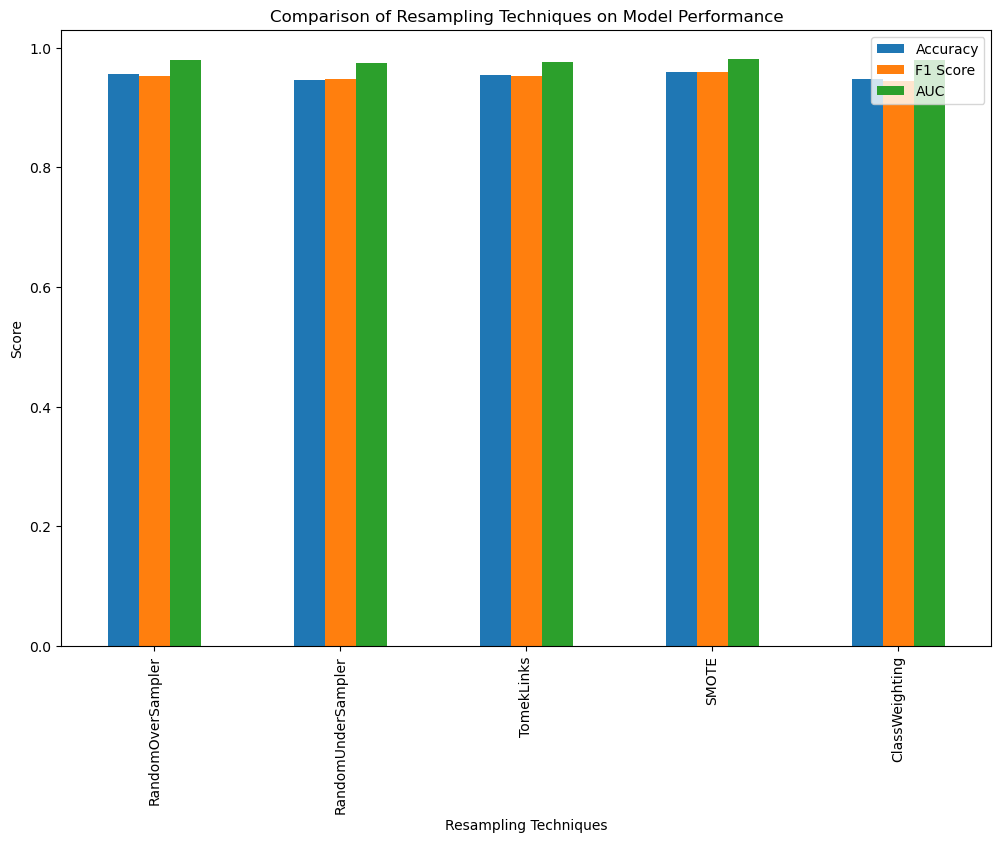

In [17]:
# Plotting performance metrics
performance_df.plot(kind='bar', figsize=(12, 8))
plt.title("Comparison of Resampling Techniques on Model Performance")
plt.xlabel("Resampling Techniques")
plt.ylabel("Score")
plt.legend()
plt.show()


In [18]:
# Summary of best techniques
best_techniques = performance_df.idxmax()
best_scores = performance_df.max()
best_summary = pd.DataFrame({'Best Technique': best_techniques, 'Best Score': best_scores})
print("\nBest Sampling Technique for Each Metric:\n", best_summary)



Best Sampling Technique for Each Metric:
          Best Technique  Best Score
Accuracy          SMOTE    0.960000
F1 Score          SMOTE    0.959050
AUC               SMOTE    0.980591
